In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [51]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import linregress

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector=inspect(engine)
columns= inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
inspector=inspect(engine)
columns= inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

<Figure size 1600x1440 with 0 Axes>

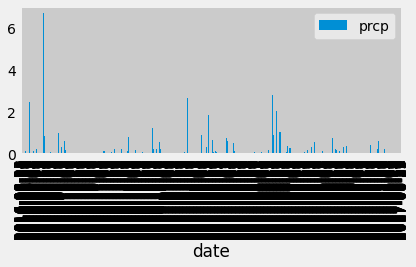

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
final_date=dt.date(2017,8,23)
starting_date=final_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

sel=[Measurement.date, func.sum(Measurement.prcp)]
prcp_data=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.prcp != 'None').\
    order_by(Measurement.date).all()


#Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp_data,columns=['date','prcp'])
prcp_df.set_index('date',inplace=True)
# Sort the dataframe by date
prcp_df.sort_index(inplace=True)
prcp_df


# Use Pandas Plotting with Matplotlib to plot the data
x_labels=['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']
plt.figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
ax=prcp_df.plot.bar(grid=True)

plt.tight_layout()
plt.show()



In [48]:
list(prcp_df.index)

['2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-03',
 '2016-09-03',
 '2016-09-03',
 '2016-09-

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data



# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).distinct().count()

9

In [80]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
test_data=session.query(Measurement.station,func.count(Measurement.station)).\
    filter(Measurement.station==Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
test_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
min_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
avg_temp=session.query(func.round(func.avg(Measurement.tobs))).filter(Measurement.station=='USC00519281').all()
 

[(72.0)]

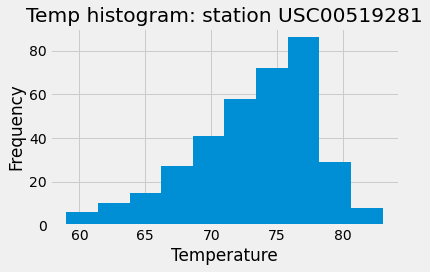

In [113]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months=session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23'). all()
weather_list=[results[0] for results in twelve_months]
station_data=pd.DataFrame(twelve_months, columns=['Temperature'])
ax=station_data.plot.hist(legend=False)
plt.xlabel('Temperature')
plt.title('Temp histogram: station USC00519281')
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()